In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

Uploading dataset

In [49]:
from google.colab import files
uploaded = files.upload()

Saving cancer patient data sets.csv to cancer patient data sets (2).csv


In [50]:
df = pd.read_csv('cancer patient data sets.csv')

In [51]:
X = df.drop(columns=['Level'])
y = df["Level"]

Selected features

In [52]:
selected_features = ['Dust Allergy', 'Obesity',	'Alcohol use', 	'OccuPational Hazards',	'Genetic Risk',	'Coughing of Blood', 'Shortness of Breath',	'Fatigue',	'Chest Pain',	'Balanced Diet', 'Smoking',	'Passive Smoker',	'Wheezing',	'Air Pollution',	'Clubbing of Finger Nails',	'Snoring',	'chronic Lung Disease']
X = df[selected_features]
y = df["Level"]

Splitting the data


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Encoding target value to numeric values.

In [56]:
if y_train.dtype == 'object':  # Check if y_train contains strings
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

Initializing the Linear Regression model


In [57]:
baseline_model = LinearRegression()

Training the model

In [58]:
baseline_model.fit(X_train, y_train)

LinearRegression()

Making predictions on the test set

In [59]:
y_pred_baseline = baseline_model.predict(X_test)

Calculating Mean Squared Error (MSE).

In [60]:
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
print(f'Mean Squared Error (MSE) for Baseline Model: {mse_baseline}')

Mean Squared Error (MSE) for Baseline Model: 0.1569037100128993


Calculating the R-squared (R²) score

In [61]:
r2_score = baseline_model.score(X_test, y_test)  # This returns R² on the test set
print(f'R-squared (R²) for Baseline Model: {r2_score}')

R-squared (R²) for Baseline Model: 0.7808530884278092


Plotting the actual vs predicted values

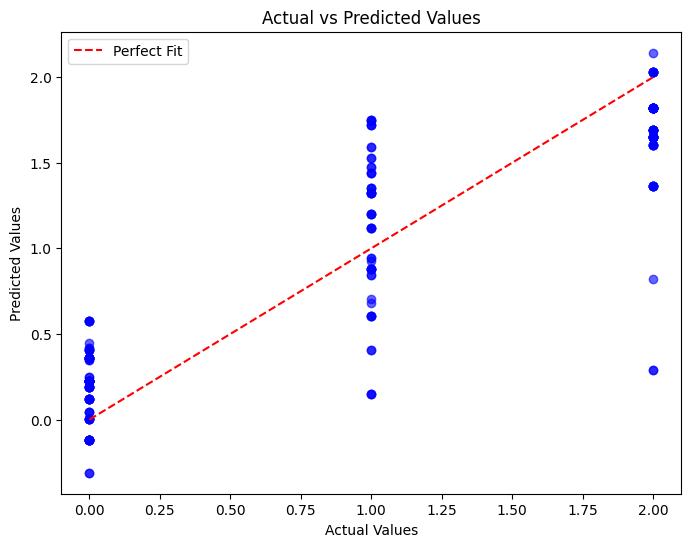

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_baseline, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()